In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv(r"/content/drive/My Drive/Colab Notebooks/ppr/D1-Cristina/S2/Office_Cristina-S2.csv",index_col='timestamp')

In [4]:
len(df)

4320

In [5]:
train_data = df.iloc[:3600]
test_data = df.iloc[3600:]

In [6]:
len(train_data),len(test_data)

(3600, 720)

In [7]:
def load_data(data, seq_len):
    X = []
    y = []
    #print(len(data))
    for i in range(seq_len, len(data)):
        X.append(data.iloc[i-seq_len : i, 0])
        y.append(data.iloc[i, 0])
        #print(y)
   
    
    return [X, y]

In [8]:
# Sequence of training data
seq_len = 24 #choose sequence length

X1, y1= load_data(train_data, seq_len)

In [9]:
#Sequence of testing data
seq_len = 24 #choose sequence length

X2, y2= load_data(test_data, seq_len)

In [10]:
X_train = X1      
y_train = y1
X_test = X2             
y_test = y2

In [11]:
# convert training and testing data to numpy array
X_train = np.array(X_train)
y_train = np.array(y_train)
  
X_test = np.array(X_test)
y_test = np.array(y_test)

# reshape data to input into 3 dimension
#X_train = np.reshape(X_train, (8016, seq_len, 1))
#X_test = np.reshape(X_test, (X_test.shape[0], seq_len, 1))

In [12]:
print('X_train.shape = ',X_train.shape)
print('y_train.shape = ',y_train.shape)
print('X_test.shape = ',X_test.shape)
print('y_test.shape = ',y_test.shape)

X_train.shape =  (3576, 24)
y_train.shape =  (3576,)
X_test.shape =  (696, 24)
y_test.shape =  (696,)


In [13]:
import tensorflow as tf
import sklearn.preprocessing
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.models import Model

In [14]:
input_layer = Input(shape=24, dtype='float32')
dense1 = Dense(24, activation='linear')(input_layer)
dense2 = Dense(18, activation='linear')(dense1)
dense3 = Dense(18, activation='linear')(dense2)
dropout_layer = Dropout(0.2)(dense2)
output_layer = Dense(1, activation='linear')(dropout_layer)
model = Model(inputs=input_layer, outputs=output_layer)
model.compile(loss='mean_squared_error', optimizer='adam')
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 24)]              0         
                                                                 
 dense (Dense)               (None, 24)                600       
                                                                 
 dense_1 (Dense)             (None, 18)                450       
                                                                 
 dropout (Dropout)           (None, 18)                0         
                                                                 
 dense_3 (Dense)             (None, 1)                 19        
                                                                 
Total params: 1,069
Trainable params: 1,069
Non-trainable params: 0
_________________________________________________________________


In [15]:
model.fit(x=X_train, y=y_train, batch_size=128, epochs=300)

Epoch 1/300
28/28 [==============================] - 1s 2ms/step - loss: 6.7549
Epoch 2/300
28/28 [==============================] - 0s 2ms/step - loss: 2.9254
Epoch 3/300
28/28 [==============================] - 0s 2ms/step - loss: 2.0828
Epoch 4/300
28/28 [==============================] - 0s 2ms/step - loss: 1.6746
Epoch 5/300
28/28 [==============================] - 0s 3ms/step - loss: 1.4443
Epoch 6/300
28/28 [==============================] - 0s 2ms/step - loss: 1.2905
Epoch 7/300
28/28 [==============================] - 0s 2ms/step - loss: 1.1987
Epoch 8/300
28/28 [==============================] - 0s 2ms/step - loss: 1.1332
Epoch 9/300
28/28 [==============================] - 0s 3ms/step - loss: 1.0296
Epoch 10/300
28/28 [==============================] - 0s 3ms/step - loss: 0.9776
Epoch 11/300
28/28 [==============================] - 0s 2ms/step - loss: 0.9066
Epoch 12/300
28/28 [==============================] - 0s 3ms/step - loss: 0.8666
Epoch 13/300
28/28 [=================

In [16]:
train_prediction=model.predict(X_train)
test_prediction=model.predict(X_test)

In [17]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from math import sqrt

In [18]:
rmse_train = sqrt(mean_squared_error(y_train, train_prediction))
rmse_test = sqrt(mean_squared_error(y_test, test_prediction))

mae_train=mean_absolute_error(y_train, train_prediction)
mae_test=mean_absolute_error(y_test, test_prediction)

mape_train = mean_absolute_percentage_error(y_train, train_prediction)
mape_test = mean_absolute_percentage_error(y_test, test_prediction)

In [19]:
print('Root Mean Squared Error for ANN Model for training is:',rmse_train)
print('Root Mean Squared Error for ANN Model for testing is:',rmse_test)
print('Mean Absolute Error for ANN Model for training is:',mae_train)
print('Mean Absolute Error for ANN Model for testing is:',mae_test)
print('MAPE for ANN Model for training is:',mape_train)
print('MAPE for ANN Model for testing is:',mape_test)

Root Mean Squared Error for ANN Model for training is: 0.60325497684424
Root Mean Squared Error for ANN Model for testing is: 0.5739617294546957
Mean Absolute Error for ANN Model for training is: 0.47410104876092074
Mean Absolute Error for ANN Model for testing is: 0.4556088700933696
MAPE for ANN Model for training is: 0.1472669969235459
MAPE for ANN Model for testing is: 0.1735966904689597


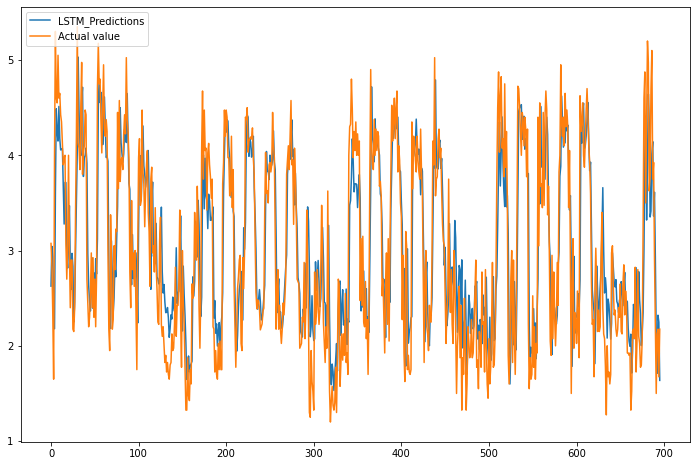

In [20]:
#pred=model.predict(X_test)
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12,8)
plt.plot(test_prediction,label='LSTM_Predictions')
plt.plot(y_test,label='Actual value')
plt.legend(loc="upper left")
plt.show()

In [21]:
y_test=y_test.reshape(-1,1)

y_test[0],test_prediction[0]

(array([3.07500005]), array([2.6264577], dtype=float32))

In [22]:
d1=[]
for i in range(len(y_test)):
    d1.append(y_test[i]-test_prediction[i])
    
print(d1)

[array([0.44854236]), array([-0.19393825]), array([-0.58635807]), array([-0.92995131]), array([1.82132745]), array([1.7101748]), array([0.11106014]), array([0.29919958]), array([0.90059233]), array([0.08719587]), array([0.4718442]), array([0.36907673]), array([0.28836966]), array([0.05476093]), array([0.21817684]), array([0.69682217]), array([0.28424501]), array([-0.6384933]), array([-0.25190639]), array([0.23383951]), array([0.9365921]), array([-0.47086787]), array([-0.44665289]), array([0.30837727]), array([-0.07075858]), array([-0.65969539]), array([-0.10054588]), array([-0.05400801]), array([0.39335704]), array([0.6419127]), array([1.30194998]), array([-0.90578747]), array([-0.38240433]), array([-0.2779088]), array([0.50387096]), array([0.40860462]), array([-0.91458058]), array([0.24721241]), array([0.12652254]), array([0.47698498]), array([0.34846544]), array([-1.21428609]), array([-0.51536202]), array([-0.4356153]), array([-0.16812682]), array([0.1850574]), array([0.38309526]), a

In [23]:
d1.sort()
# Range of error value
max(d1),min(d1)

(array([2.0433557]), array([-1.58330488]))

In [24]:
neg=[]
pos=[]
for i in range(len(d1)):
  if(d1[i]<0):
    neg.append(d1[i])
  if(d1[i]>0):  
    pos.append(d1[i])

In [25]:
len(neg),len(pos)

(400, 296)